<a href="https://colab.research.google.com/github/andreafalcon05-collab/Inteligencia-Artificial/blob/main/Multicapa/Clasificacion_Flor_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificacion de la Flor del Iris
Caracteristicas: Largo, ancho, petalos
* Setosa
* Virginica
* Versicolor


In [ ]:
"""Cargamos el DATASET"""
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
"""imprime las variables que contiene"""
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
"""Imprime la informacion del Dataset"""
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
"""Explora los valores que contienen las llaves"""
iris.target_names
iris.target
iris.data
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
"""se importa pandas para crear dataframe"""
import pandas as pd

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
"""muestra descripcion estadistica"""
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Procesamiento de Datos

**TARGET**
* 0:Especie Setosa
* 1:Especie Versicolor
* 2:Especie Virginica

In [ ]:
"""Define los parametros y target"""
X = iris_df
y = pd.get_dummies(iris.target).values


In [ ]:
""" Divide los datos en entramiento y prueba"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)


In [ ]:
"""Longitud del conjunto en entramiento y test"""
print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


#Escala de Imagenes
* 0: Media
* 1: Esviacion estandar

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Red Neuronal


*   **Sequential**: Define el modelo neuronal
*   Se añaden capas de entrada y ocultas densamente conectadas **Dense** con activación ReLU y una capa de salida con activación softmax para clasificar las flores del iris en 3 clases.




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax'),
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Compilar el modelo
* **Adam**: Optimizador con tasa de aprendizaje 0.001
* **Copilacion del modelo**: Se utliza el optimizador Adam y a función de pérdida de entropía cruzada categórica dispersa (categorical_crossentropy) para la clasificación.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)


In [ ]:
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


#Entrenar el modelo
**FIT**: Especifica el número de épocas, el tamaño del lote y la proporción de validación para monitorear el rendimiento del modelo durante el entrenamiento.

In [ ]:
history = modelo.fit(
    X_train, y_train,
    epochs=10, batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5278 - loss: 0.8793 - val_accuracy: 0.8667 - val_loss: 0.3880
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7885 - loss: 0.4666 - val_accuracy: 0.9000 - val_loss: 0.2608
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8424 - loss: 0.3210 - val_accuracy: 0.9333 - val_loss: 0.1842
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9299 - loss: 0.2236 - val_accuracy: 0.9333 - val_loss: 0.1771
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.1864 - val_accuracy: 1.0000 - val_loss: 0.0877
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9580 - loss: 0.1529 - val_accuracy: 1.0000 - val_loss: 0.0706
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9299 - loss: 0.1620 - val_accuracy: 1.0000 - val_loss: 0.0590
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0691 - val_accuracy: 1.

#Graficando la funcion de perdida
La función de pérdida debe tender hacia cero, para poder decir que el modelo esta teniendo un aprendizaje correcto.

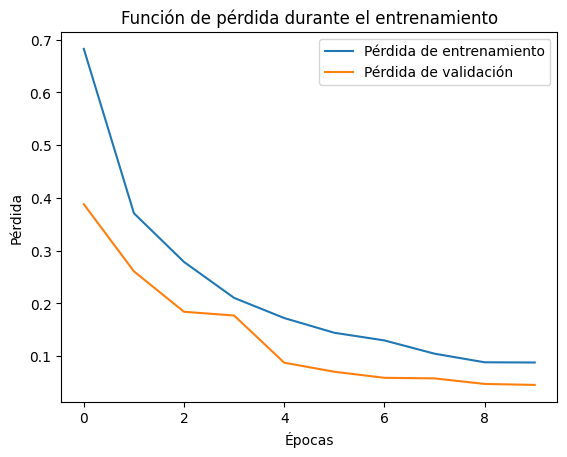

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


#Evaluacion
Evaluar modelo en conjunto de prueba

**Evaluate**: Evalua el rendimiento del modelo donde se obtienen la pérdida y la precisión del modelo en los datos de prueba.

In [ ]:
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 1.0000 - loss: 0.0456
Loss: 0.0455818735063076, Accuracy: 1.0


#Prediccion
Hace la prediccion y compara con valores reales

In [ ]:
import numpy as np
predictions = modelo.predict(X_test)
# Obtener el índice de la clase predicha para cada punto de datos
predicted_classes = np.argmax(predictions, axis=1)
# Obtenemos el índice de la clase real de y_test
actual_classes = np.argmax(y_test, axis=1)

comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})
# Agregar columnas con los nombres reales y predichos de las flores utilizando iris.target_names
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
# Reordenar las columnas para una mejor visualización
comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor


#Matriz confusion y Sensibilidad (recall)


*   **Confusion_matrix**: calcula la matris de confusion
*   **recall_score**: calcula la sensibilidad para cada clase



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

y_pred = modelo.predict(X_test)
# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
# Calcular la sensibilidad
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


#Visualiza la matriz de confusion y mostrar la sensibilidad para cada clase.


*   **Matriz de confusion**: imagen de colores
*   **Recall**: indica qué tan efectivo es el modelo para encontrar todas las instancias positivas en comparación con el total de instancias positivas reales en el conjunto de datos.

*1.0(100%):* significa que el modelo identifica todas las instancias positivas correctamente, es decir, no hay falsos negativos.

*0.0(0%):*  que el modelo no identifica ninguna instancia positiva correctamente, es decir, todos los casos positivos son clasificados como negativos (falsos negativos).


Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0


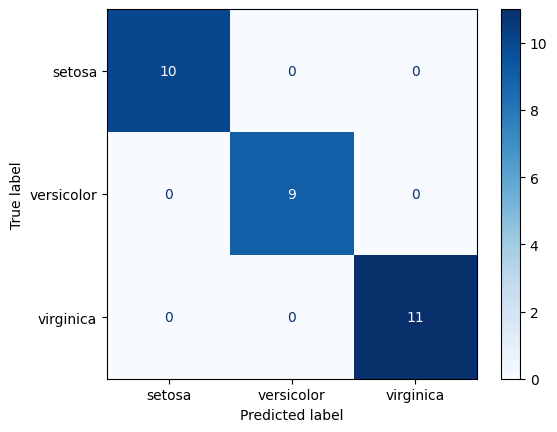

In [ ]:
# Visualizar la matriz de confusión como una imagen de colores
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')
